In [ ]:
!pip install tweepy pandas nltk matplotlib seaborn scikit-learn python-dotenv

In [ ]:
# Import libraries
import os
import pandas as pd
import tweepy
import nltk
from dotenv import load_dotenv
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer

In [40]:
import tweepy

# Load environment variables from .env file
load_dotenv()

# Fetch Bearer Token from the environment
BEARER_TOKEN = os.getenv("BEARER_TOKEN")

if not BEARER_TOKEN:
    raise ValueError("Bearer Token not found. Ensure it is defined in the .env file.")

# Create a Tweepy client
client = tweepy.Client(bearer_token=BEARER_TOKEN)

print("Twitter API v2 Authentication Successful!")

Twitter API v2 Authentication Successful!


In [ ]:
# Define search query
query = "stock market OR investing OR stocks -is:retweet lang:en"

# Fetch recent tweets
response = client.search_recent_tweets(
    query=query,
    max_results=100,  # Number of tweets to fetch (max: 100 for free tier)
    tweet_fields=["created_at", "text"]
)

# Extract tweets into a list of dictionaries
tweets = [{"created_at": tweet.created_at, "text": tweet.text} for tweet in response.data]

# Convert to a DataFrame
tweets_df = pd.DataFrame(tweets)

# Save to a CSV for backup
tweets_df.to_csv("tweets.csv", index=False)

print("Tweets fetched and saved successfully!")
print(tweets_df.head())

Unauthorized: 401 Unauthorized
Unauthorized

In [ ]:
import re

# Define a function to clean tweet text
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)    # Remove mentions
    text = re.sub(r"[^A-Za-z\s]", "", text)  # Remove non-alphabet characters
    text = text.lower()  # Convert to lowercase
    return text

# Apply the function to clean tweets
tweets_df["cleaned_text"] = tweets_df["text"].apply(clean_text)

print("Cleaned Tweets:")
print(tweets_df[["text", "cleaned_text"]].head())

Cleaned Tweets:
                                                text  \
0  Leave nothing in a corrupt system that robs it...   
1  @crygraph Sell #VeChain \nBuy  #GRT \n#GRC20 \...   
2  Making $1,000 from investments \nchanges your ...   
3  @TRHLofficial Couple of months ago I came acro...   
4  Why you should invest long-term. Stop thinking...   

                                        cleaned_text  
0  leave nothing in a corrupt system that robs it...  
1   sell vechain \nbuy  grt \ngrc \nbuythedip \nh...  
2  making  from investments \nchanges your money ...  
3   couple of months ago i came across a tweet ab...  
4  why you should invest longterm stop thinking s...  


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download the VADER lexicon
nltk.download("vader_lexicon")

# Initialize the VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Calculate sentiment scores
tweets_df["sentiment"] = tweets_df["cleaned_text"].apply(lambda x: analyzer.polarity_scores(x)["compound"])

# Label sentiment as positive, negative, or neutral
tweets_df["sentiment_label"] = tweets_df["sentiment"].apply(lambda x: "positive" if x > 0.05 else "negative" if x < -0.05 else "neutral")

print("Sentiment Analysis Complete!")
print(tweets_df[["cleaned_text", "sentiment", "sentiment_label"]].head())

Sentiment Analysis Complete!
                                        cleaned_text  sentiment  \
0  leave nothing in a corrupt system that robs it...     0.0516   
1   sell vechain \nbuy  grt \ngrc \nbuythedip \nh...     0.0000   
2  making  from investments \nchanges your money ...     0.8074   
3   couple of months ago i came across a tweet ab...     0.8469   
4  why you should invest longterm stop thinking s...     0.1027   

  sentiment_label  
0        positive  
1         neutral  
2        positive  
3        positive  
4        positive  


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Simulated stock movement data (1 for up, 0 for down)
tweets_df["stock_movement"] = tweets_df["sentiment_label"].apply(lambda x: 1 if x == "positive" else 0)

# Define features (sentiment score) and labels (stock movement)
X = tweets_df[["sentiment"]]
y = tweets_df["stock_movement"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets!")

Data split into training and testing sets!


In [ ]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("Model training complete!")

Model training complete!


In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Print classification metrics
print("Model Evaluation Metrics:")
print(classification_report(y_test, y_pred))

Model Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       1.00      0.79      0.88        14

    accuracy                           0.85        20
   macro avg       0.83      0.89      0.84        20
weighted avg       0.90      0.85      0.86        20



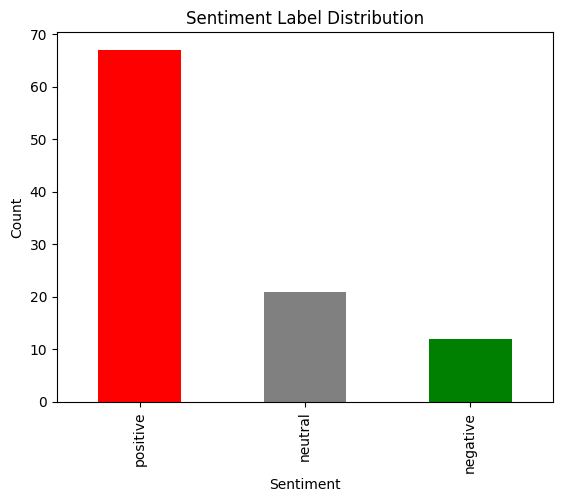

In [ ]:
import matplotlib.pyplot as plt

# Plot sentiment label distribution
tweets_df["sentiment_label"].value_counts().plot(kind="bar", color=["red", "gray", "green"])
plt.title("Sentiment Label Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

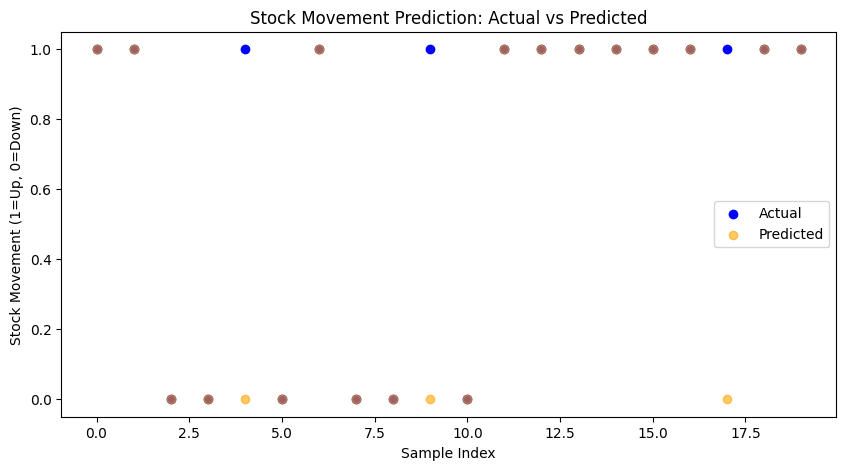

In [ ]:
# Compare actual vs. predicted stock movements
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, color="blue", label="Actual")
plt.scatter(range(len(y_pred)), y_pred, color="orange", alpha=0.6, label="Predicted")
plt.title("Stock Movement Prediction: Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Stock Movement (1=Up, 0=Down)")
plt.legend()
plt.show()

In [ ]:
import joblib

# Save the trained model
joblib.dump(model, "stock_movement_model.pkl")
print("Model saved successfully!")

Model saved successfully!
